            Sales
Date             
2023-01-01    175
2023-01-02    189
2023-01-03    164
2023-01-04    184
2023-01-05    196

Missing Values:
Sales    0
dtype: int64


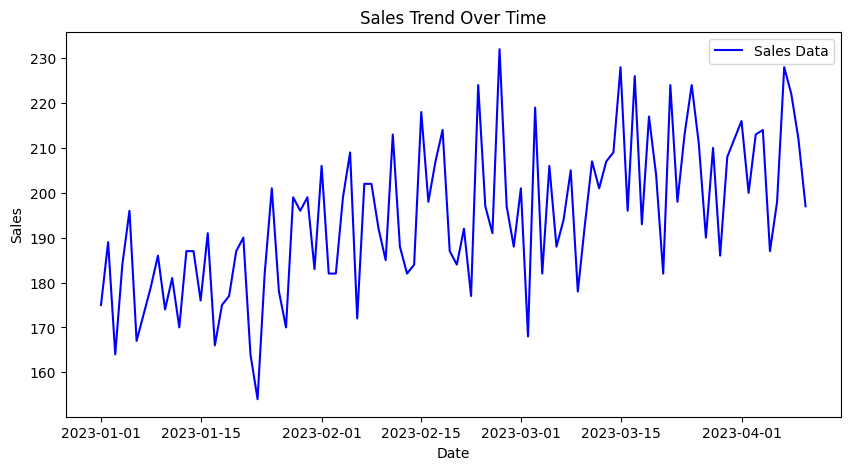

ADF Statistic: -1.2027888397165665
P-Value: 0.6723948743512478
The data is non-stationary. Differencing is needed.
Forecasted Sales for next 10 periods:
 2023-04-11    211.120196
2023-04-12    209.456560
2023-04-13    207.716128
2023-04-14    209.080840
2023-04-15    208.600893
2023-04-16    208.623811
2023-04-17    208.703108
2023-04-18    208.651178
2023-04-19    208.666908
2023-04-20    208.667553
Freq: D, Name: predicted_mean, dtype: float64


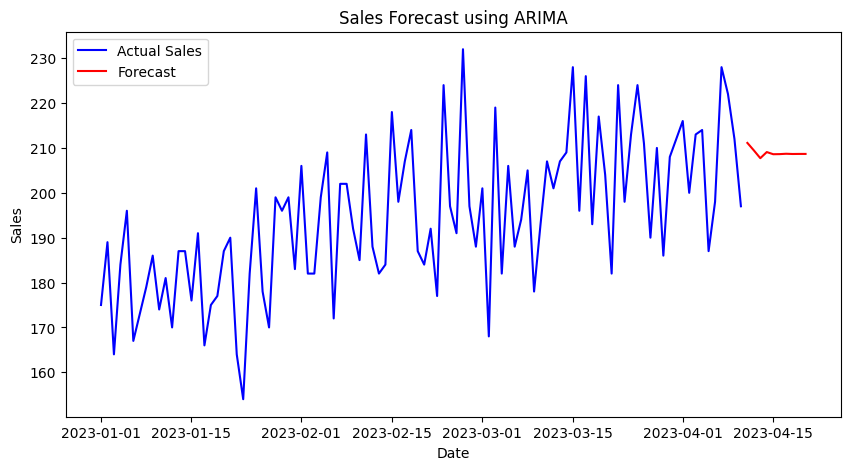

In [6]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import warnings
warnings.filterwarnings("ignore")

#load and inspect dataset
df=pd.read_csv('sales_data_.csv',parse_dates=['Date'],index_col='Date')
df = df.asfreq('D')

#display first few rows
print(df.head())

#check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

#visualize sales trends
#plot sales over time
plt.figure(figsize=(10,5))
plt.plot(df.index,df['Sales'],label="Sales Data",color='blue')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Trend Over Time')
plt.legend()
plt.show()

#Check Stationarity (Dickey-Fuller Test)
from statsmodels.tsa.stattools import adfuller

#Perform Dickey-Fuller Test
result=adfuller(df['Sales'])
print(f"ADF Statistic: {result[0]}")
print(f"P-Value: {result[1]}")

if result[1]>0.05:
    print("The data is non-stationary. Differencing is needed.")
else:
    print("The data is stationary.")

#build ARIMA Model
#Fit ARIMA Model (assuming p=2,d=1,q=2 based on ACF/PACF)
model=ARIMA(df['Sales'],order=(2,1,2))
model_fit=model.fit()

#forecast next 10 periods
forecast=model_fit.forecast(steps=10)
print("Forecasted Sales for next 10 periods:\n",forecast)

#visualize forecast
#plot original and forecasted sales
plt.figure(figsize=(10,5))
plt.plot(df.index,df['Sales'],label="Actual Sales",color='blue')
plt.plot(pd.date_range(start=df.index[-1],periods=11,freq='D')[1:],forecast,label="Forecast",color='red')
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Sales Forecast using ARIMA")
plt.legend()
plt.show()


   Age  Gender  Cholesterol  Blood Pressure  Heart Disease
0   68    Male          210             138              0
1   58    Male          197             101              0
2   44  Female          296             150              1
3   72  Female          153             108              0
4   37  Female          184             165              1

Missing Values:
Age               0
Gender            0
Cholesterol       0
Blood Pressure    0
Heart Disease     0
dtype: int64
Training samples: 160, Testing samples: 40
Model Accuracy: 0.55

Confusion Matrix:
[[22  0]
 [18  0]]


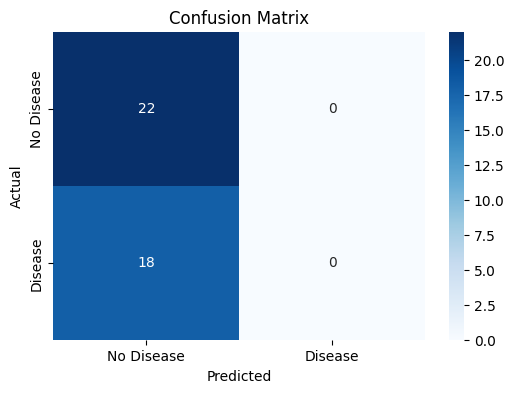


Classification Report:
              precision    recall  f1-score   support

           0       0.55      1.00      0.71        22
           1       0.00      0.00      0.00        18

    accuracy                           0.55        40
   macro avg       0.28      0.50      0.35        40
weighted avg       0.30      0.55      0.39        40


Full report saved to classification_report.txt


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

df = pd.read_csv("heart_disease.csv")

print(df.head())

print("\nMissing Values:")
print(df.isnull().sum())

X = df.drop(columns=['Heart Disease'])
y = df['Heart Disease']

X = pd.get_dummies(X, drop_first=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("\nClassification Report:")
report = classification_report(y_test, y_pred)
print(report)

with open("classification_report.txt", "w") as f:
    f.write(report)

print("\nFull report saved to classification_report.txt")